In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

About the dataset:

The Facebook Live Sellers in Thailand is a dataset curated in UCI Machine Learning Datasets. It data contains 7050 observations and twelve attributes. In this assignment, the preprocessed dataset contains 7050 instances and 10 attributes. The details of the attributes are as follows:

* status_type: The type of shared status
* num_reactions: Number of glimpses over a shared status by viewers
* num_comments: Number of comments on that particular shared status
* num_shares: Toal number of shares by peers
* num_likes: Number of likes on the post
* num_loves: Number of love emojis of that shared post
* num_wows: Number of wow emojis on that post
* num_hahas: Number of haha emojis on that post
* num_sads: Number of sad emojis on that post
* num_angrys: Number of angry emojis on that post

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv')

In [3]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

# Exploratory Data Analysis (EDA)

The last four columns do not have any values in them and they are all NaN, so they can be dropped.

In [5]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis = 1, inplace=True)

In [6]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


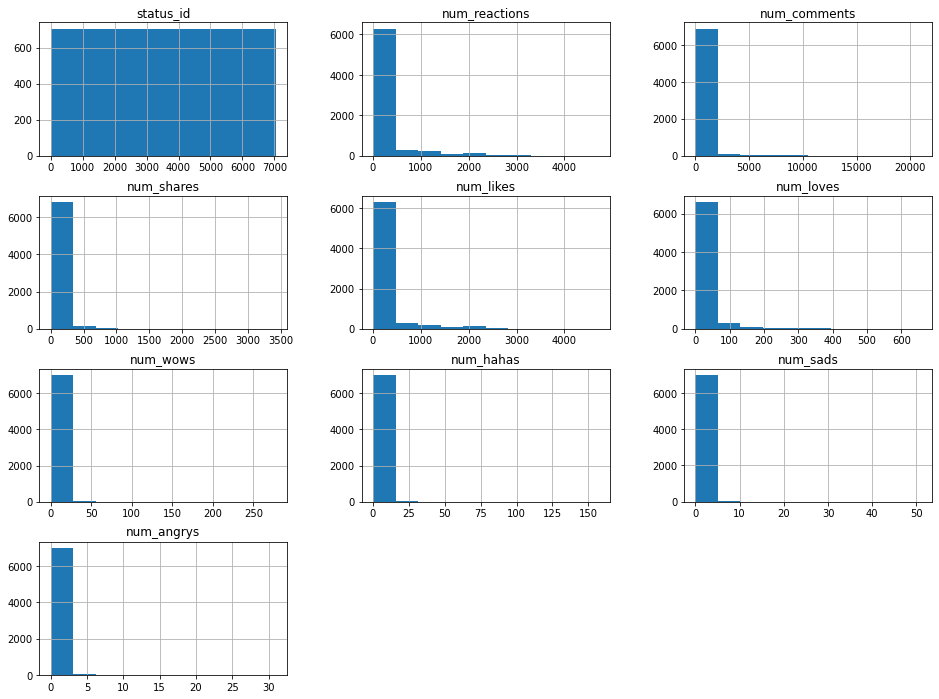

In [7]:
df.hist(bins=10, figsize=(16,12))
plt.show()

In [8]:
df.status_type.value_counts()

photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64

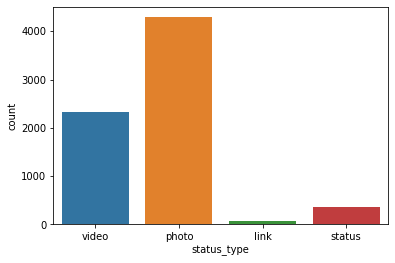

In [9]:
sns.countplot(x='status_type', data=df);

Here, we see that Photos have the most posts, followed by Videos

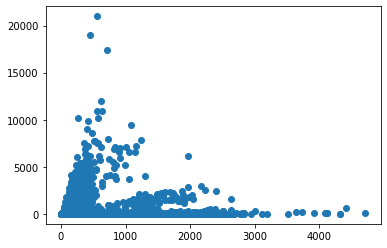

In [10]:
plt.scatter(df.num_reactions,df.num_comments)

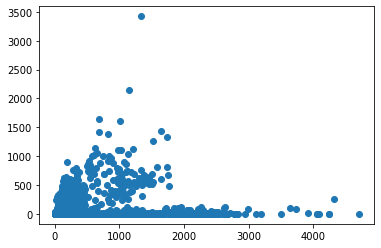

In [11]:
plt.scatter(df.num_likes,df.num_shares)

In [12]:
df.num_sads.value_counts()

0     6443
1      321
2      113
3       64
4       37
5       14
8       12
6       12
7        6
10       6
19       4
12       2
46       2
17       2
13       2
23       2
28       1
51       1
21       1
37       1
11       1
22       1
14       1
9        1
Name: num_sads, dtype: int64

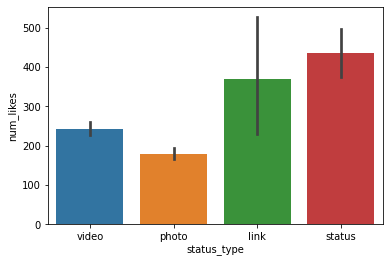

In [13]:
sns.barplot(x="status_type", y="num_likes", data=df);

Here, we see that Statuses have the most likes

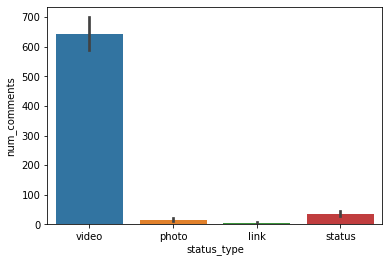

In [14]:
sns.barplot(x="status_type", y="num_comments", data=df);

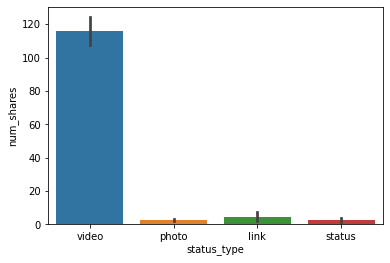

In [15]:
sns.barplot(x="status_type", y="num_shares", data=df);

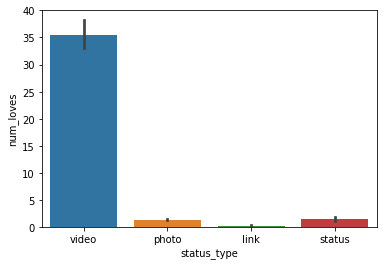

In [16]:
sns.barplot(x="status_type", y="num_loves", data=df);

Videos have the most comments, loves and shares

In [17]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.status_type = le.fit_transform(df['status_type'])
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,3,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,1,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,3,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,1,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,1,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,1,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,7047,1,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,7048,1,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,7049,1,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [20]:
df.corr()

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
status_id,1.000000,0.156051,-0.186568,0.183191,0.206444,-0.208331,0.155523,0.059781,0.115097,0.042887,0.096676
status_type,0.156051,1.000000,0.102860,0.320975,0.390910,0.067423,0.388612,0.093844,0.177903,0.081233,0.130989
num_reactions,-0.186568,0.102860,1.000000,0.150843,0.250723,0.994923,0.305003,0.267752,0.176028,0.075138,0.124326
num_comments,0.183191,0.320975,0.150843,1.000000,0.640637,0.101687,0.521223,0.162394,0.325048,0.236453,0.225184
num_shares,0.206444,0.390910,0.250723,0.640637,1.000000,0.172492,0.820000,0.407628,0.399826,0.199970,0.312513
num_likes,-0.208331,0.067423,0.994923,0.101687,0.172492,1.000000,0.209308,0.207800,0.120784,0.052169,0.087431
num_loves,0.155523,0.388612,0.305003,0.521223,0.820000,0.209308,1.000000,0.508798,0.507830,0.207600,0.371001
num_wows,0.059781,0.093844,0.267752,0.162394,0.407628,0.207800,0.508798,1.000000,0.287756,0.086503,0.183087
num_hahas,0.115097,0.177903,0.176028,0.325048,0.399826,0.120784,0.507830,0.287756,1.000000,0.141421,0.211910
num_sads,0.042887,0.081233,0.075138,0.236453,0.199970,0.052169,0.207600,0.086503,0.141421,1.000000,0.142072


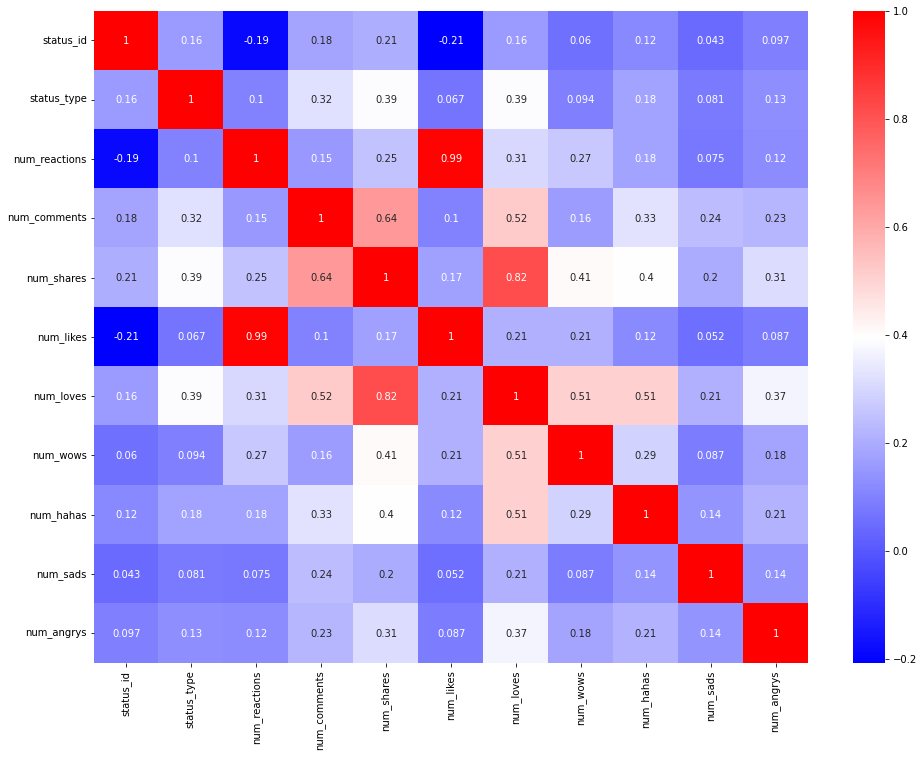

In [21]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), cmap='bwr', annot=True);

We see that Status type has good correlation with number of likes, shares and loves. Also, number of likes has high correlation with number of reactions, and number of shares has high correlation with number of loves.

We go on to drop status_id and status_published as it does not give too much information

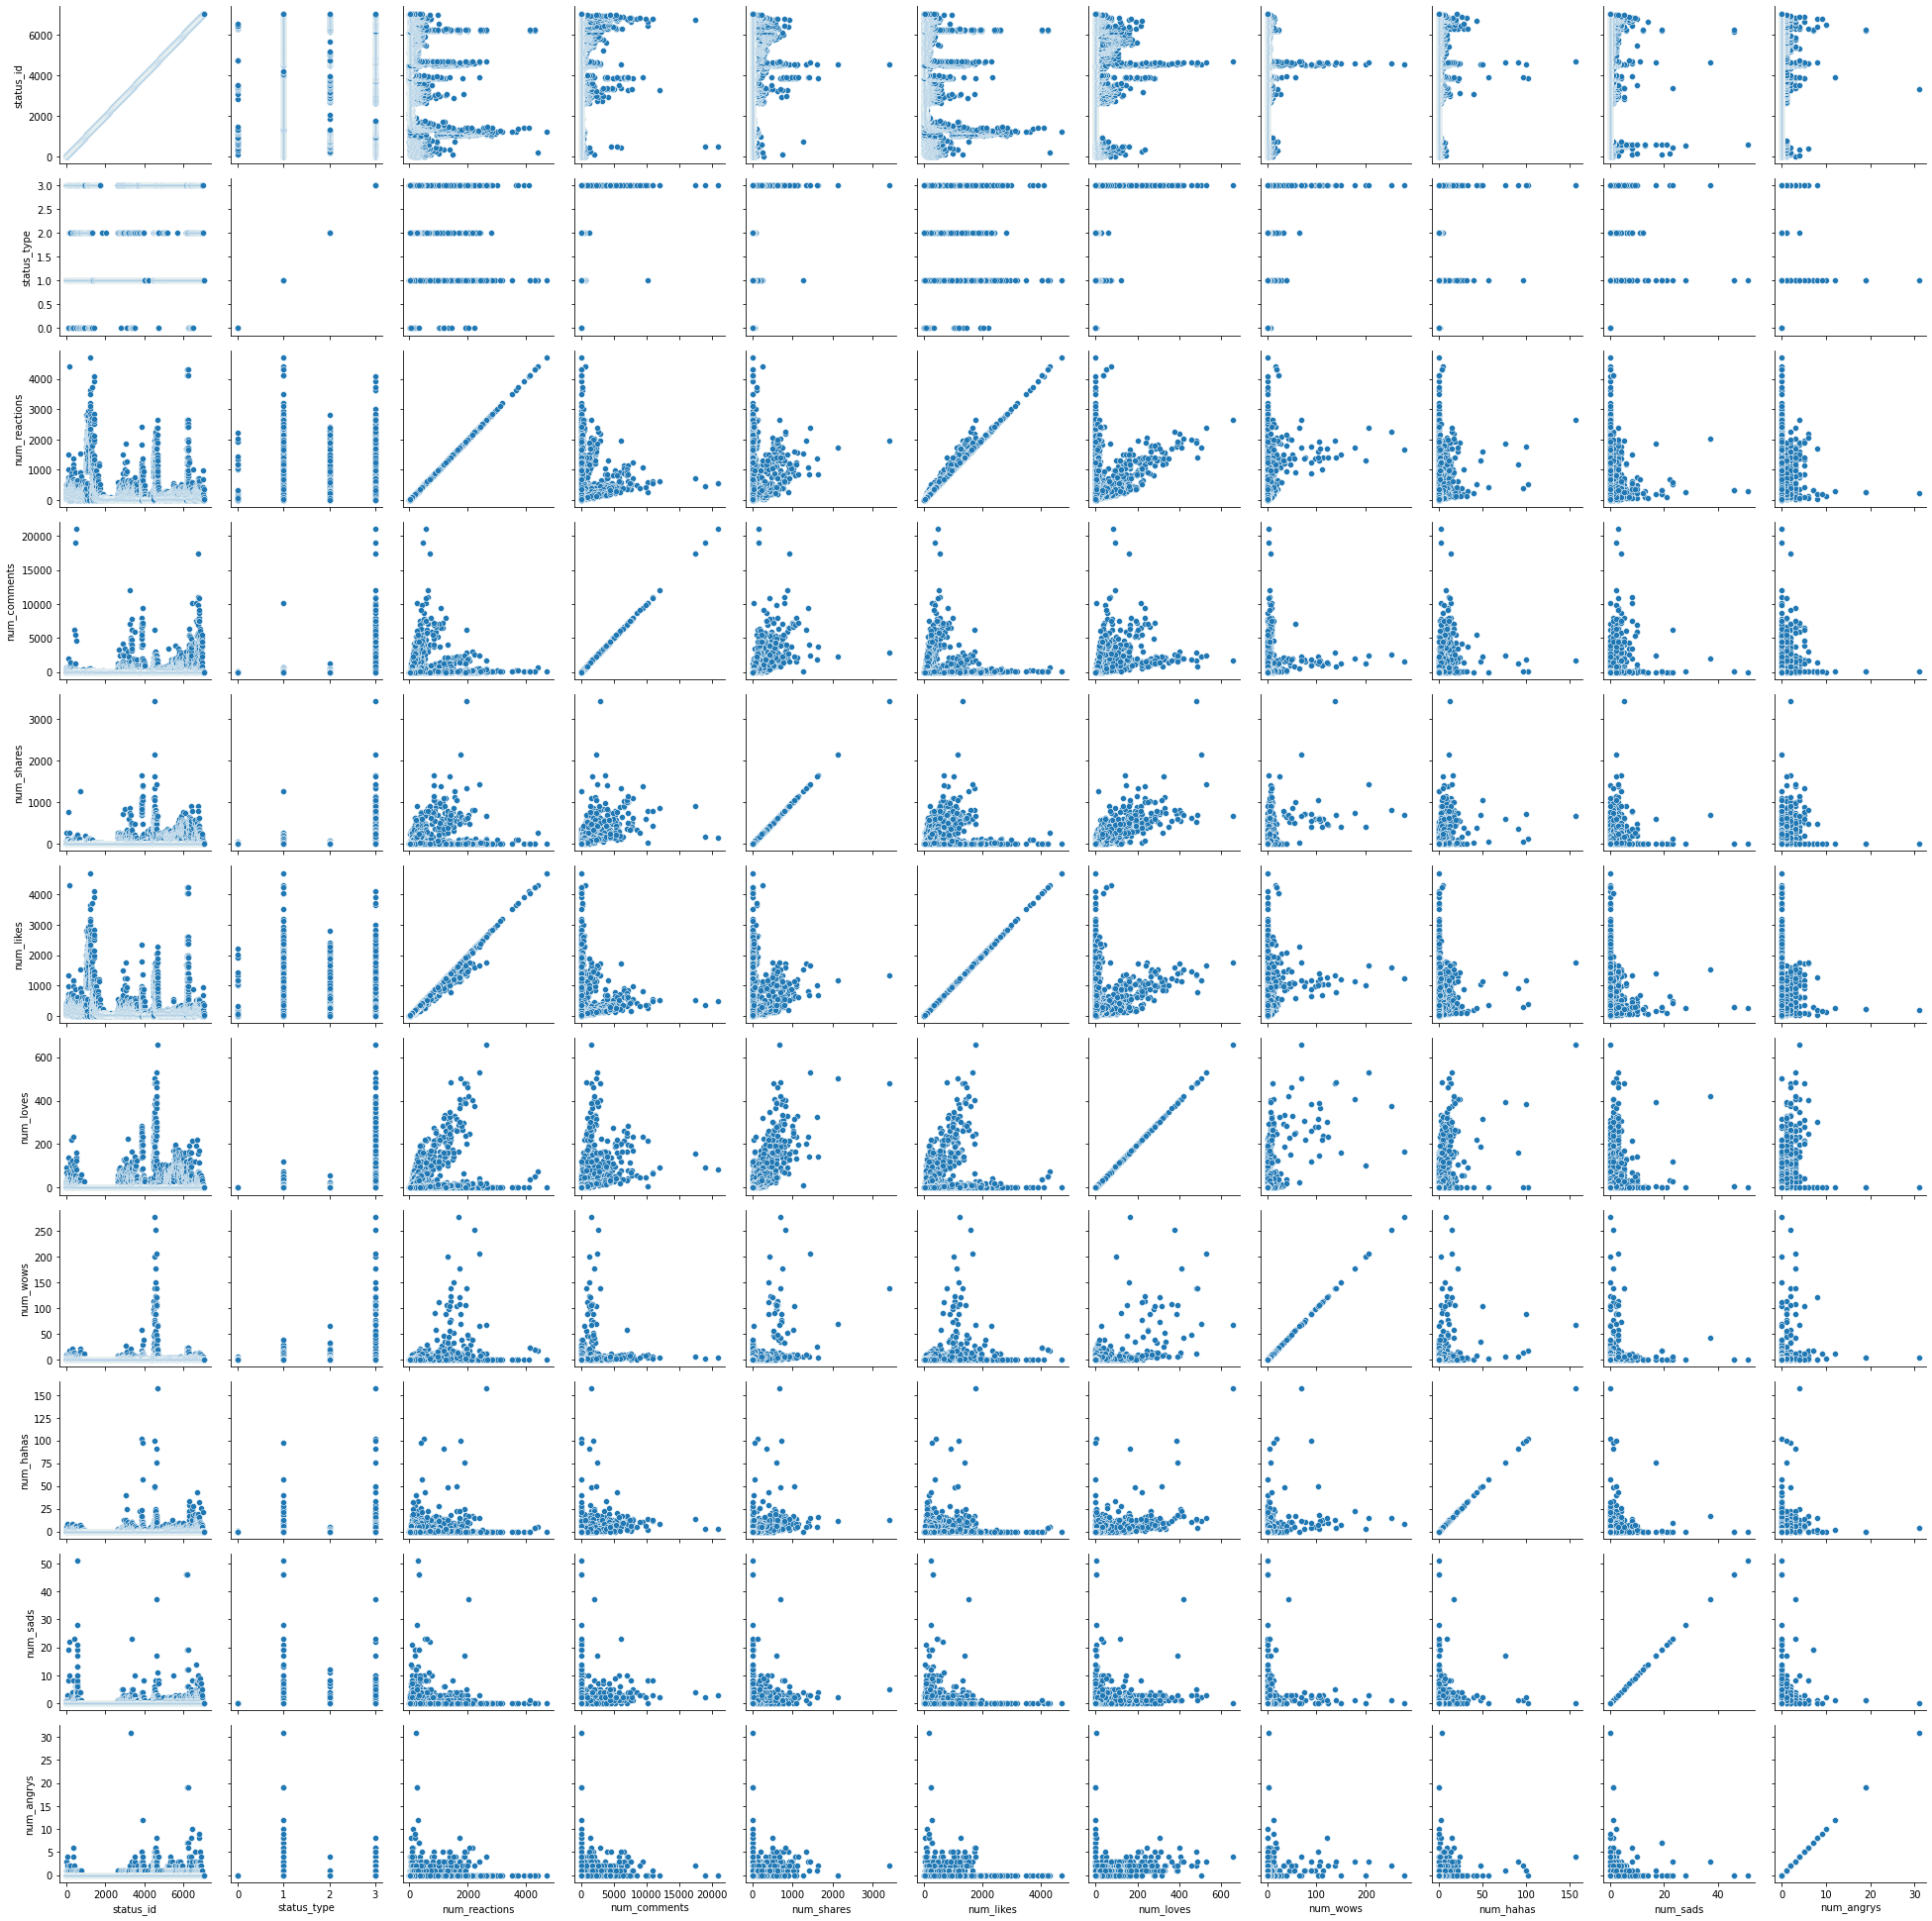

In [22]:
# Visualize the data correlation and identify variables for further analysis
g = sns.PairGrid(df)
g.map(sns.scatterplot);

The status id and status published columns do not seem to be very important, so we drop them.

In [23]:
df.drop(['status_id', 'status_published'], axis = 1, inplace=True)

In [24]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [25]:
df1 = df.copy()
df1.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


# Unsupervised Learning

In [26]:
# We perform normalization to scale numerical data prior to modeling using Min-max scaling technique
scaler = MinMaxScaler()

cols = df1.columns
scaler.fit(df1[cols])
df1[cols] = scaler.transform(df1[cols])

df1.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


We now try to find the value of k for the KMeans using the elbow method

In [27]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df1[cols])
    sse.append(km.inertia_)

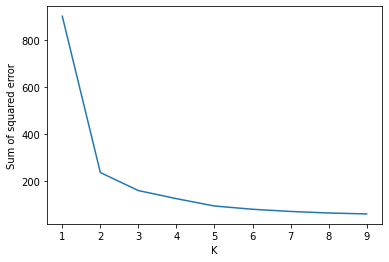

In [28]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

We now try to verify the value of k gotten from the elbow method using the silhouette score

In [39]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 9

for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(df1[cols])
  labels = kmeans.labels_
  sil.append(silhouette_score(df1[cols], labels, metric = 'euclidean'))

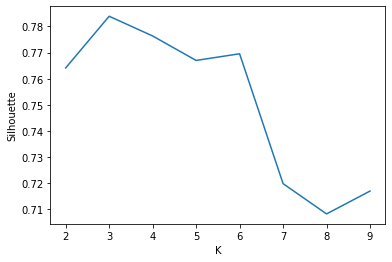

In [41]:
plt.xlabel('K')
plt.ylabel('Silhouette')
plt.plot(range(2, kmax+1),sil)

Going by the Elbow Method and the Silhouette scores, we can verify that the k-value should be 3

In [42]:
# Assigning Cluster Labels

kmeans = KMeans(
init="random",
n_clusters=3,
n_init=10,
max_iter=300,
random_state=0
)

In [43]:
kmeans.fit(df1)

KMeans(init='random', n_clusters=3, random_state=0)

In [44]:
# The lowest SSE value
kmeans.inertia_

161.5963340003362

In [45]:
# Final locations of the centroids
kmeans.cluster_centers_

array([[3.28742853e-01, 1.99588196e-02, 6.50282622e-04, 5.37894046e-04,
        1.94880247e-02, 1.93982105e-03, 2.03104006e-03, 1.16647149e-03,
        2.84240297e-03, 1.51976868e-03],
       [9.63364293e-01, 5.06532935e-02, 2.77360441e-02, 3.04804142e-02,
        4.28478700e-02, 4.90844018e-02, 8.17287347e-03, 1.00742442e-02,
        8.36216840e-03, 7.50274643e-03],
       [4.79102956e-01, 4.00444107e-01, 3.03960092e-03, 4.33797051e-03,
        3.99082569e-01, 5.26906195e-03, 9.70232988e-03, 1.26609400e-03,
        9.59405169e-04, 1.97297031e-04]])

In [46]:
# The number of iterations required to converge
kmeans.n_iter_

9

In [49]:
# Checking the first five predicted labels

y_kmeans = kmeans.predict(df1)
y_kmeans[:5]

array([1, 0, 1, 0, 0], dtype=int32)

In [50]:
df1['cluster'] = y_kmeans
df1.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,1
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,1
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0


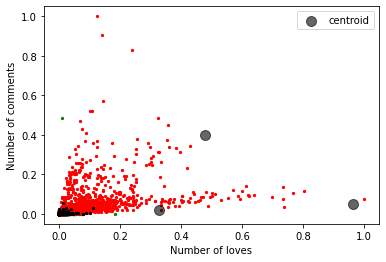

In [51]:
# Visualizing the results

dfa = df1[df1.cluster == 0]
dfb = df1[df1.cluster == 1]
dfc = df1[df1.cluster == 2]

plt.scatter(dfa.num_loves, dfa.num_comments,color='green', s=5)
plt.scatter(dfb.num_loves, dfb.num_comments,color='red', s=5)
plt.scatter(dfc.num_loves, dfc.num_comments,color='black', s=5)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.6, label='centroid');
plt.xlabel('Number of loves')
plt.ylabel('Number of comments')
plt.legend()

In [52]:
# External Validation with rand score and adjusted rand score

from sklearn.metrics import rand_score
rand_score(y_kmeans,df1['status_type'])

0.9252775857749552

In [53]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y_kmeans, df1['status_type'])

0.850354088906488

We get high scores on the external validation metrics, we know model did well with the clustering

# Principal Component Analysis (PCA)

In [55]:
dfa = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/fruit_data.csv')

Here, we use PCA to find the first two principal components of the fruit dataset Scale the value. Each feature will be centered (zero mean) and with unit variance Analysis, and PCA is performed with 4 components and their explained_variance_ratio printed

In [56]:
dfa.head()

,fruit_label,mass,width,height,color_score
0,1,192,8.4,7.3,0.55
1,1,180,8.0,6.8,0.59
2,1,176,7.4,7.2,0.60
3,2,86,6.2,4.7,0.80
4,2,84,6.0,4.6,0.79


In [57]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fruit_label  59 non-null     int64  
 1   mass         59 non-null     int64  
 2   width        59 non-null     float64
 3   height       59 non-null     float64
 4   color_score  59 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 2.4 KB


In [59]:
# Scaling the value so that each feature is centered with zero mean and with unit variance

from sklearn.preprocessing import StandardScaler
X_used = dfa[['mass','width','height','color_score']]

scaler = StandardScaler()
X_used = scaler.fit_transform(X_used)

In [60]:
from sklearn.decomposition import PCA

pca_2 = PCA(
    n_components=2,
    random_state=1
)

res_2 = pca_2.fit_transform(X_used)

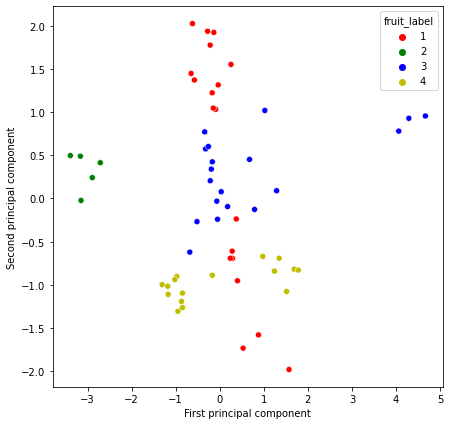

In [63]:
# some visualization with first two principal components
fig,ax = plt.subplots(figsize=(7,7))
color = ['r','g','b','y']
sns.scatterplot(x = res_2[:,0],y = res_2[:,1],hue = dfa['fruit_label'],palette = color )
ax.xaxis.label.set_size(10)
ax.yaxis.label.set_size(10)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

In [64]:
pca_4 = PCA(
    n_components=4,
    random_state=1
)

res_4 = pca_4.fit_transform(X_used)

In [65]:
print('Variance of each component ',pca_4.explained_variance_ratio_)
print('Total variance',round(sum(pca_4.explained_variance_ratio_),2))

Variance of each component  [0.57845054 0.25650171 0.14402362 0.02102413]
Total variance 1.0


With the first two components, we see about 83% of the variance of dataset explained and about 98% of the variance explained with the first three components. Therefore, it will be okay to perform dimensionality reduction on this dataset.